In [35]:
import pandas as pd 
from sklearn.manifold import TSNE
import ast
import json
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
import json
from sklearn.linear_model import LogisticRegression
import pyro.distributions as dist


In [71]:
def tsne_plot(emb, color_map, labels, n_comp=2):
    low_emb = TSNE(n_components=2).fit_transform(emb)
    plt.scatter(low_emb[:,0], low_emb[:,1], c = [color_map[y] for y in labels])
    plt.show()

## Visualizing doc2vec

In [17]:
# doc2vec_dat = pd.read_csv('./data/embedded_doc2vec_imdb.csv', header=0, names=['text','label','embedding'], converters={"embedding": lambda x: [float(y) for y in (x.strip("[]").split(", "))]})
# doc2vec_emb = doc2vec_dat.embedding.values
# labels = doc2vec_dat.label.values
# color_map = { 'positive':'red', 'negative':'green'}
# en = {'positive':0, 'negative':1}
# encoded_label = [en[y] for y in labels]

In [19]:
doc2vec_dat = pd.read_csv('./data/embedded_doc2vec_bbc.csv', header =0, names=['text','label','embedding'], converters={"embedding": lambda x: [float(y) for y in (x.strip("[]").split(", "))]})
doc2vec_emb = doc2vec_dat.embedding.values
labels = doc2vec_dat.label.values
color_map = { 'business':'red', 'entertainment':'green', 'politics':'blue', 'sport':'yellow','tech':'pink'}
en = { 'business':0, 'entertainment':1, 'politics':2, 'sport':3,'tech':4}
encoded_label = [en[y] for y in labels]

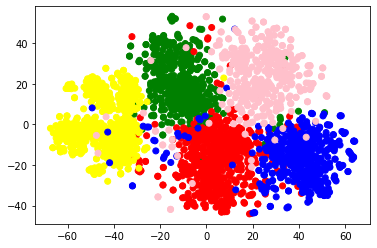

In [30]:
tsne_plot(doc2vec_emb.tolist(), color_map, labels)

In [14]:
model = LogisticRegression()
cv_doc2vec = cross_validate(model, doc2vec_emb.tolist(), encoded_label, cv=3)
print("Doc2Vec classification performance : \n", cv_doc2vec)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Doc2Vec classification performance : 
 {'fit_time': array([5.7323029 , 5.15830803, 4.04646969]), 'score_time': array([0.68231106, 0.25843191, 0.24770617]), 'test_score': array([0.78341733, 0.7775111 , 0.78219129])}


# Bayesian Paragraph vectors

In [3]:
import torch

In [8]:
import pickle

In [31]:
import pyro

In [32]:
len(d_i)

2225

In [37]:
E = 100
phi = 1

In [38]:
d_i = [pyro.sample("d_i", dist.MultivariateNormal( torch.zeros(E), phi*torch.eye(E))) for each in range(len(d_i))]


In [82]:
!ls expts/UW2VecVTrained

README U      V      di


In [93]:
d_i = torch.load('expts/expt5/di', map_location=torch.device('cpu'))

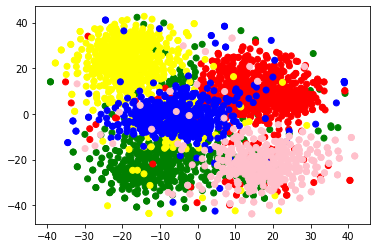

In [94]:
tsne_plot(np.array([x.data.numpy() for x in d_i]), color_map, labels)

In [95]:
model = LogisticRegression()
cv_bpv = cross_validate(model, [x.data.numpy() for x in d_i], encoded_label, cv=3)
print("BPV classification performance : \n", cv_bpv)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


BPV classification performance : 
 {'fit_time': array([0.15030622, 0.19447494, 0.10524607]), 'score_time': array([0.00147295, 0.001405  , 0.00156116]), 'test_score': array([0.90174966, 0.87061995, 0.86891892])}


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [28]:
type(d_i[0])

torch.Tensor

In [45]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt


In [62]:
low_emb = TSNE(n_components=2).fit_transform([x.data.numpy() for x in d_i])


In [57]:
low_emb

array([[-44.5781   , -18.89193  , -62.679195 ],
       [ 21.787146 , -17.662815 , -10.804216 ],
       [ 39.99115  , -42.947704 ,   3.6647062],
       ...,
       [-26.900726 ,  19.803865 ,  64.93299  ],
       [ 28.911985 , -52.460106 ,  -7.894479 ],
       [ 32.70724  , -46.64851  , -77.43091  ]], dtype=float32)